**Fast and Easy Image-Based Coffee Plant Disease Detection Application**

# Import Library

In [1]:
# Visualization
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Dir manipulation
import os
from shutil import copyfile

# Model Machine Learning
import tensorflow as tf
  # Library Optimizer
from tensorflow.keras.optimizers import RMSprop
  # Libary Image preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Matrix Manipulation
import numpy as np

# Etc
import random

In [2]:
base_dir = "D:/hamzah/skripsi/Coffee Leaf Diseases/final"
#Folder Train, Validation, and Testing
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
testing_dir = os.path.join(base_dir, 'testing')

# Directory with training  pictures
train_healthy_dir = os.path.join(train_dir, 'healthy')
train_miner_dir = os.path.join(train_dir, 'miner')
train_phoma_dir = os.path.join(train_dir, 'phoma')
train_rust_dir = os.path.join(train_dir, 'rust')

# Directory with validation pictures
validation_healthy_dir = os.path.join(validation_dir, 'healthy')
validation_miner_dir = os.path.join(validation_dir, 'miner')
validation_phoma_dir = os.path.join(validation_dir, 'phoma')
validation_rust_dir = os.path.join(validation_dir, 'rust')

# Directory with testing pictures
testing_healthy_dir = os.path.join(testing_dir, 'healthy')
testing_miner_dir = os.path.join(testing_dir, 'miner')
testing_phoma_dir = os.path.join(testing_dir, 'phoma')
testing_rust_dir = os.path.join(testing_dir, 'rust')

In [3]:
train_healthy_fnames = os.listdir( train_healthy_dir )
train_miner_fnames = os.listdir( train_miner_dir )
train_phoma_fnames = os.listdir( train_phoma_dir )
train_rust_fnames = os.listdir( train_rust_dir )

In [4]:
#Print Total Images
print('total training healthy images :', len(os.listdir(train_healthy_dir )))
print('total training miner images :', len(os.listdir(train_miner_dir )))
print('total training phoma images :', len(os.listdir(train_phoma_dir )))
print('total training rust images :', len(os.listdir(train_rust_dir )), "\n")

print('total validation healthy images :', len(os.listdir(validation_healthy_dir)))
print('total validation miner images :', len(os.listdir(validation_miner_dir)))
print('total validation phoma images :', len(os.listdir(validation_phoma_dir)))
print('total validation rust images :', len(os.listdir(validation_rust_dir)), "\n")

print('total testing healthy images :', len(os.listdir(testing_healthy_dir)))
print('total testing miner images :', len(os.listdir(testing_miner_dir)))
print('total testing phoma images :', len(os.listdir(testing_phoma_dir)))
print('total testing rust images :', len(os.listdir(testing_rust_dir)))

total training healthy images : 386
total training miner images : 386
total training phoma images : 386
total training rust images : 386 

total validation healthy images : 49
total validation miner images : 49
total validation phoma images : 49
total validation rust images : 49 

total testing healthy images : 49
total testing miner images : 49
total testing phoma images : 49
total testing rust images : 49


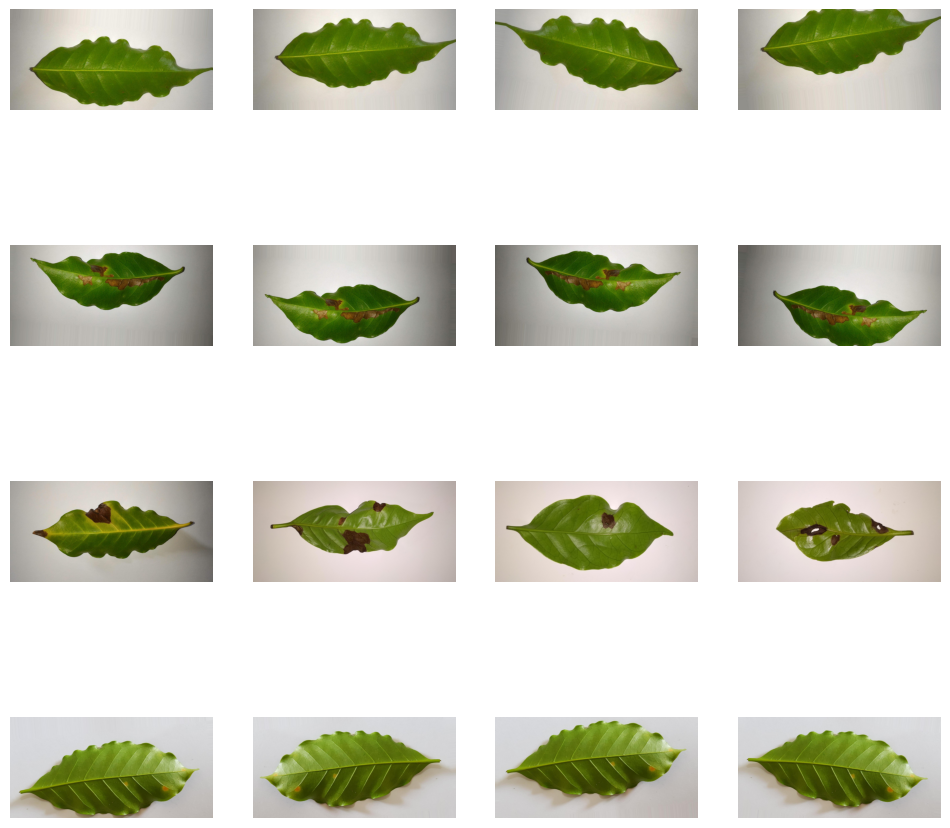

In [5]:
#Showing Sample Image each Class

%matplotlib inline

# Parameters for our graph; we'll output images in a 4x8 configuration
nrows = 8
ncols = 4

pic_index = 0 # Index for iterating over images

# Set up matplotlib fig, and size it to fit 4x8 pics
fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=4

next_healthy_pix = [os.path.join(train_healthy_dir, fname)
                for fname in train_healthy_fnames[ pic_index-4:pic_index]
               ]

next_miner_pix = [os.path.join(train_miner_dir, fname)
                for fname in train_miner_fnames[ pic_index-4:pic_index]
               ]

next_phoma_pix = [os.path.join(train_phoma_dir, fname)
                for fname in train_phoma_fnames[ pic_index-4:pic_index]
               ]

next_rust_pix = [os.path.join(train_rust_dir, fname)
                for fname in train_rust_fnames[ pic_index-4:pic_index]
               ]

for i, img_path in enumerate(next_healthy_pix+next_miner_pix+next_phoma_pix+next_rust_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# Data Preparation & Augmentation

In [6]:
# Augmentasi ringan dan normalisasi
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalisasi tanpa augmentasi untuk validation set
validation_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
from keras.preprocessing.image import img_to_array, load_img
import os

def augment_class_images(datagen, class_dir, target_num):
    num_images = len(os.listdir(class_dir))
    total_needed = target_num - num_images
    images = os.listdir(class_dir)
    generated = 0  # Reset penghitung untuk setiap kelas

    if total_needed <= 0:
        print("Tidak perlu augmentasi untuk", class_dir)
        return

    print(f"Memulai augmentasi di {class_dir} untuk mencapai {target_num} gambar.")

    for fname in images:
        if generated >= total_needed:
            print(f"Jumlah target tercapai untuk {class_dir}.")
            break

        img_path = os.path.join(class_dir, fname)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Loop untuk menghasilkan gambar baru
        for x_aug in datagen.flow(x, batch_size=1, save_to_dir=class_dir, save_prefix='aug', save_format='jpeg'):
            generated += 1
            if generated >= total_needed:
                print(f"Jumlah target tercapai dengan {fname}.")
                break

    print(f"Augmentasi total selesai untuk {class_dir}. {generated} gambar ditambahkan.")

# Contoh penggunaan
augment_class_images(train_datagen, train_healthy_dir, 386)
augment_class_images(train_datagen, train_miner_dir, 386)
augment_class_images(train_datagen, train_phoma_dir, 386)
augment_class_images(train_datagen, train_rust_dir, 386)


Tidak perlu augmentasi untuk D:/hamzah/skripsi/Coffee Leaf Diseases/final\train\healthy
Tidak perlu augmentasi untuk D:/hamzah/skripsi/Coffee Leaf Diseases/final\train\miner
Tidak perlu augmentasi untuk D:/hamzah/skripsi/Coffee Leaf Diseases/final\train\phoma
Tidak perlu augmentasi untuk D:/hamzah/skripsi/Coffee Leaf Diseases/final\train\rust


In [8]:
# Verifikasi jumlah gambar di setiap kelas setelah augmentasi
for class_dir in [train_healthy_dir, train_miner_dir, train_phoma_dir, train_rust_dir]:
    print(f"Total images in {class_dir.split('/')[-1]}: {len(os.listdir(class_dir))}")

Total images in final\train\healthy: 386
Total images in final\train\miner: 386
Total images in final\train\phoma: 386
Total images in final\train\rust: 386


In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=128,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Nonaktifkan shuffle
)

testing_generator = validation_datagen.flow_from_directory(
    testing_dir,
    target_size=(256, 256),
    batch_size=25,
    class_mode='categorical',
    shuffle=False  # Nonaktifkan shuffle
)


Found 1544 images belonging to 4 classes.
Found 196 images belonging to 4 classes.
Found 196 images belonging to 4 classes.


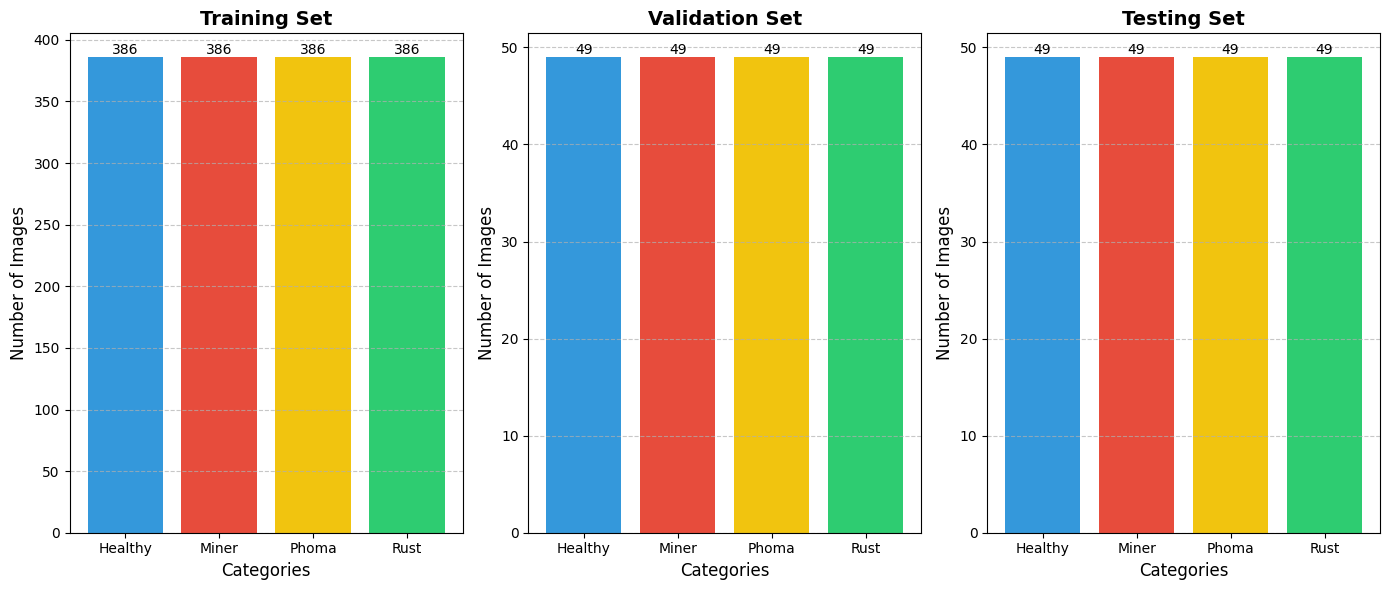

In [10]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Menghitung jumlah file di setiap direktori
train_images = [len(os.listdir(train_healthy_dir)),
                len(os.listdir(train_miner_dir)),
                len(os.listdir(train_phoma_dir)),
                len(os.listdir(train_rust_dir))]

val_images = [len(os.listdir(validation_healthy_dir)),
              len(os.listdir(validation_miner_dir)),
              len(os.listdir(validation_phoma_dir)),
              len(os.listdir(validation_rust_dir))]

test_images = [len(os.listdir(testing_healthy_dir)),
               len(os.listdir(testing_miner_dir)),
               len(os.listdir(testing_phoma_dir)),
               len(os.listdir(testing_rust_dir))]

# Kategori kelas
categories = ['Healthy', 'Miner', 'Phoma', 'Rust']

# Warna yang lebih menarik
colors = ['#3498db', '#e74c3c', '#f1c40f', '#2ecc71']

# Membuat subplot lebih lebar agar label tidak bertumpuk
plt.figure(figsize=(14, 6))

# Plotting untuk training data
plt.subplot(1, 3, 1)
bars1 = plt.bar(categories, train_images, color=colors)
plt.title('Training Set', fontsize=14, weight='bold')
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan nilai di atas batang
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height(), int(bar.get_height()), 
             ha='center', va='bottom', fontsize=10, color='black')

# Plotting untuk validation data
plt.subplot(1, 3, 2)
bars2 = plt.bar(categories, val_images, color=colors)
plt.title('Validation Set', fontsize=14, weight='bold')
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan nilai di atas batang
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height(), int(bar.get_height()), 
             ha='center', va='bottom', fontsize=10, color='black')

# Plotting untuk testing data
plt.subplot(1, 3, 3)
bars3 = plt.bar(categories, test_images, color=colors)
plt.title('Testing Set', fontsize=14, weight='bold')
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan nilai di atas batang
for bar in bars3:
    plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height(), int(bar.get_height()), 
             ha='center', va='bottom', fontsize=10, color='black')

# Adjust layout
plt.tight_layout()
plt.show()


# Modeling Architecture

## Custome Model 1

### Architecture

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(416, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 416)            │     3,834,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        53,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,424,164 (16.88 MB)

 Trainable params: 4,424,164 (16.88 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Set training parameters
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=3.5481e-05),
              metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(
      train_generator,
      epochs=2,
      verbose=1,
      validation_data = validation_generator)

Epoch 1/2


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.2602 - loss: 1.3869 - val_accuracy: 0.2500 - val_loss: 1.3827
Epoch 2/2
13/13 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.2583 - loss: 1.3826 - val_accuracy: 0.2500 - val_loss: 1.3788


Text(0.5, 1.0, 'Training and validation loss')

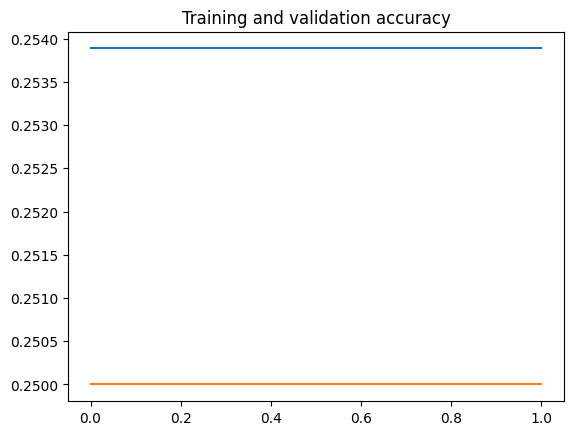

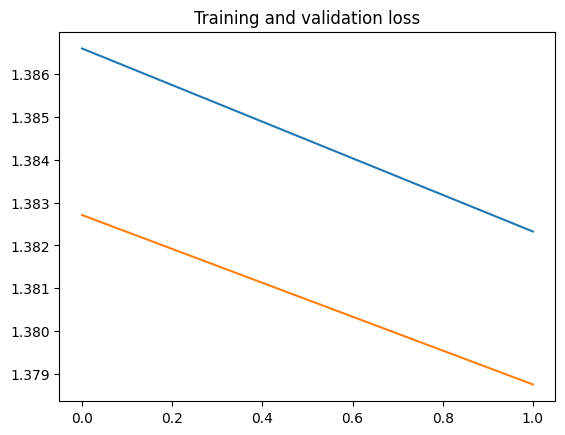

In [15]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

# Hyperparameter Tunning

### Define Callback for Hyperparameter Tuning

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import RMSprop

# Callback 1: LearningRateScheduler (dengan batasan learning rate maksimum 0.0005)
lr_schedule = LearningRateScheduler(
    lambda epoch: min(1e-4 * 10 ** (epoch / 20), 0.0005), 
    verbose=1
)

# Callback 2: ReduceLROnPlateau (pengurangan learning rate jika stagnan)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5,  
    patience=3,  
    min_lr=1e-7,  
    verbose=1
)

# Callback 3: ModelCheckpoint (simpan model terbaik berdasarkan val_loss)
checkpoint = ModelCheckpoint(
    'best_model_custom_rmsprop_fixed.keras',  
    monitor='val_loss', 
    save_best_only=True, 
    verbose=1
)

# Callback 4: EarlyStopping (hentikan pelatihan jika stagnan)
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5,  
    restore_best_weights=True,  
    verbose=1
)

# Compile model dengan optimizer RMSprop
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.0001),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,  
    epochs=50,  
    validation_data=validation_generator,  
    callbacks=[lr_schedule, reduce_lr, checkpoint, early_stopping],
    verbose=1
)


Epoch 1: LearningRateScheduler setting learning rate to 0.0001.
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2629 - loss: 1.3811
Epoch 1: val_loss improved from inf to 1.37004, saving model to best_model_custom_rmsprop_fixed.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.2633 - loss: 1.3811 - val_accuracy: 0.2551 - val_loss: 1.3700 - learning_rate: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.00011220184543019634.
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2653 - loss: 1.3747
Epoch 2: val_loss did not improve from 1.37004
13/13 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.2660 - loss: 1.3746 - val_accuracy: 0.2500 - val_loss: 1.3710 - learning_rate: 1.1220e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.00012589254117941674.
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3222 - loss: 1.3639
Epoch 3: val_loss improved from 1.37004 to 1.32478, saving model to best_model_custom_rms

In [17]:
# from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#         lambda epoch: 1e-5 * 10 ** (epoch / 20))

# # ReduceLROnPlateau Callback: Mengurangi learning rate saat val_loss tidak membaik
# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                                                  patience=5, min_lr=1e-7)

# # ModelCheckpoint Callback: Menyimpan model terbaik berdasarkan val_loss
# checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', 
#                                                 monitor='val_loss', 
#                                                 save_best_only=True)

# # EarlyStopping Callback: Menghentikan pelatihan jika tidak ada peningkatan val_loss setelah 3 epoch
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
#                                                   patience=5, 
#                                                   restore_best_weights=True)

# # Compile model with initial learning rate
# model.compile(loss='categorical_crossentropy',
#                   optimizer=RMSprop(learning_rate=1e-5),
#                   metrics=['accuracy'])

# # Training model with multiple callbacks
# history = model.fit(train_generator, 
#                         epochs=50,  
#                         validation_data=validation_generator, 
#                         callbacks=[reduce_lr, checkpoint, early_stopping])

### Visualize Hyperparameter Performance

In [18]:
# Load model terbaik yang disimpan oleh ModelCheckpoint
best_model = tf.keras.models.load_model('best_model_custom_rmsprop_fixed.keras')

# Evaluasi model terbaik pada validation/test set
loss, accuracy = best_model.evaluate(validation_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 370ms/step - accuracy: 0.9159 - loss: 0.2009
Validation Loss: 0.24521072208881378
Validation Accuracy: 0.8877550959587097


#### Accuracy & loss plot

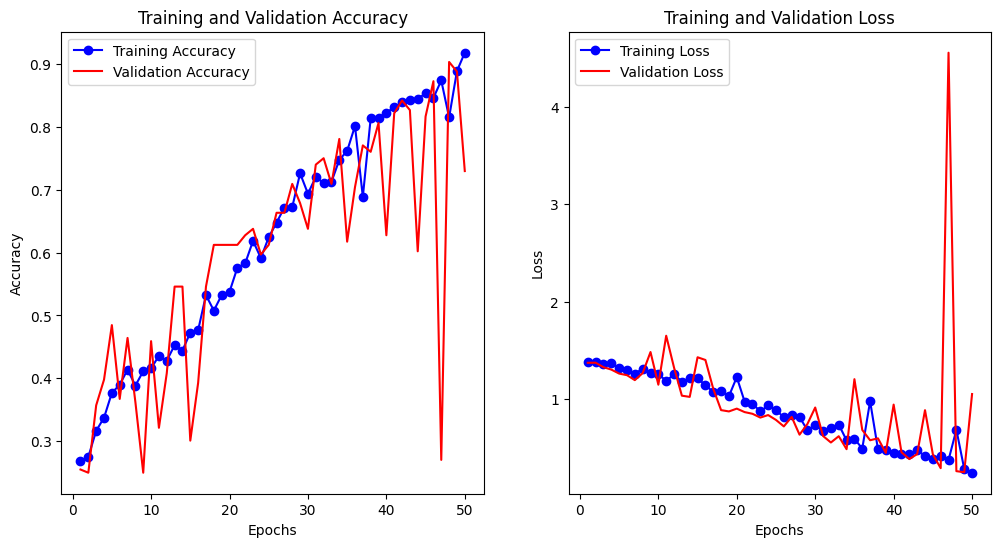

In [19]:

# Ambil nilai akurasi dan loss dari history training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)  # Jumlah epoch

# Plot Akurasi Training dan Validation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss Training dan Validation
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate Model

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Melakukan prediksi pada data validation
predictions = model.predict(testing_generator)

# Konversi prediksi probabilitas ke label kategori
y_pred = np.argmax(predictions, axis=1)

# Mendapatkan label aktual
y_true = testing_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report (Precision, Recall, F1-score, Accuracy)
print("Classification Report:")
print(classification_report(y_true, y_pred))


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 321ms/step
Confusion Matrix:
[[46  0  1  2]
 [ 1 42  5  1]
 [ 0  1 48  0]
 [ 2  4  0 43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        49
           1       0.89      0.86      0.88        49
           2       0.89      0.98      0.93        49
           3       0.93      0.88      0.91        49

    accuracy                           0.91       196
   macro avg       0.91      0.91      0.91       196
weighted avg       0.91      0.91      0.91       196



8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 313ms/step


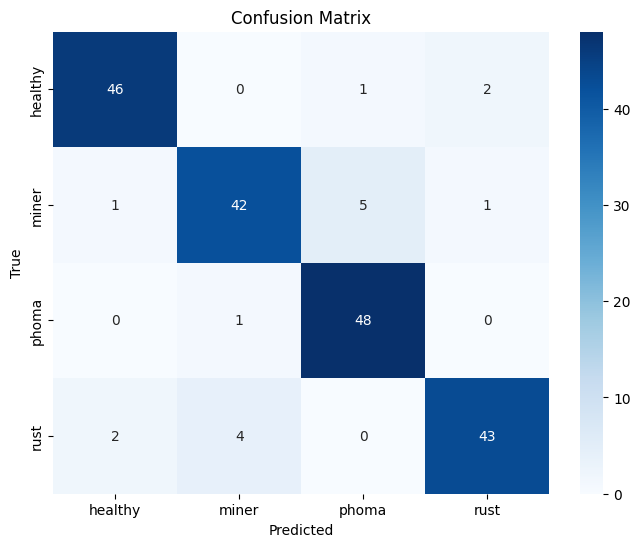

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Melakukan prediksi pada data validation
predictions = model.predict(testing_generator)

# Konversi prediksi probabilitas ke label kategori
y_pred = np.argmax(predictions, axis=1)

# Mendapatkan label aktual
y_true = testing_generator.classes

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualisasi confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# save model

In [22]:
model.save("D:/hamzah/skripsi/model/final_custom.h5")